In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

sjerplot = gpd.read_file('/Users/erikrobertsson/Desktop/dpdshapefile/dpdshapefile.shp')
nonzero = sjerplot.loc[~(sjerplot["X"] == 0) & ~(sjerplot["Y"] == 0) & ~(sjerplot["Cancelled"] != 0)].copy()

print(nonzero.shape) 
nonzero.head(6)

(278274, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
5,21000011,None,1/1/2021,12:04:08AM,Wireless 911 Call,3,SUSPICIOUS PERSON,100 LANDSBURY DR,2007390,806379,D3,321,Resolved Without Report,0,POINT (2007390.00000 806379.00000)


In [3]:
nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 322145 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  322145 non-null  int64   
 1   Case Numbe  45106 non-null   object  
 2   Call Date   322145 non-null  object  
 3   Call Time   322145 non-null  object  
 4   Source      322145 non-null  object  
 5   Priority    321585 non-null  object  
 6   Nature      322145 non-null  object  
 7   Address     322145 non-null  object  
 8   X           322145 non-null  int64   
 9   Y           322145 non-null  int64   
 10  District    319333 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  322145 non-null  object  
 13  Cancelled   322145 non-null  int64   
 14  geometry    322145 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 39.3+ MB


In [4]:
nonzero["Source"].value_counts()

Self Initiated                   156822
Wireless 911 Call                 84917
Phone Call                        44009
E-911                             16132
Alarm Line                         9934
ASAP Alarm Interface               4090
{Other}                            2737
Language Line                      1589
Report Only                         816
Radio                               540
Texting                             340
DCI Message                         155
In House Translation                 39
Telephone Device For The Deaf        17
(blank)                               8
Name: Source, dtype: int64

In [5]:
type(nonzero)

geopandas.geodataframe.GeoDataFrame

In [6]:
nonzero.total_bounds


array([1.94495900e+06, 6.40691000e+05, 2.06715984e+08, 8.68232260e+07])

In [7]:
nonzero.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
nonzero.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
331072    Point
331073    Point
331074    Point
331075    Point
331076    Point
Length: 322145, dtype: object

In [9]:
nonzero.shape

(322145, 15)

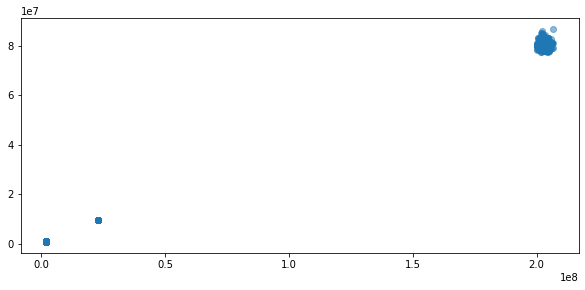

In [13]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
nonzero.plot(ax = ax, alpha = 0.5, aspect=1)
plt.show()

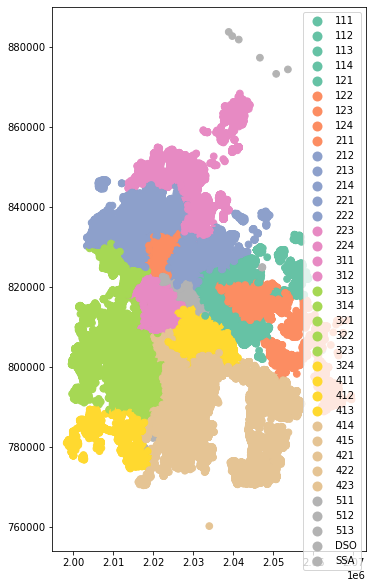

In [14]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [18]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')
# policebeats2 = policebeats.to_crs("SR-ORG:12")
# law_beat_shapefile.to_file("path/to/new/output/file.shp")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


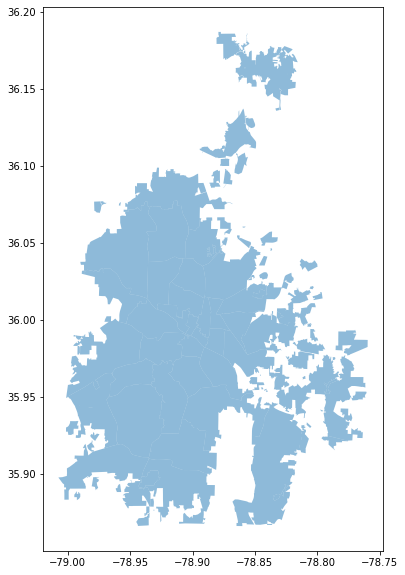

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

In [28]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
policebeats = policebeats.to_crs("EPSG:3395")
nonzero = nonzero.to_crs("EPSG:3395")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-8779309.770 4300283.146, -8779325.1..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-8778355.845 4299948.653, -8778355.1..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-8779306.684 4300228.899, -8779291.3..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-8779306.684 4300228.899, -8779361.7..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-8779158.450 4300058.827, -8779153.2..."


In [25]:
beatswithcalls = nonzero.sjoin(policebeats, how="inner", predicate='contains')
beatswithcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,...,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen
